# 84.51 Carbo-Loading Case Study ||| Zoe Zirlin, Zoe.Zirlin@uga.edu

# Data and package importation

In [134]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.stats import stats
import seaborn as sns
from matplotlib import rcParams

In [135]:
casual = pd.read_csv('/Users/zoezirlin/Desktop/8451_Carbo-Loading/Carbo-Loading CSV/causal_lookup.csv')
product = pd.read_csv('/Users/zoezirlin/Desktop/8451_Carbo-Loading/Carbo-Loading CSV/product_lookup.csv')
store = pd.read_csv('/Users/zoezirlin/Desktop/8451_Carbo-Loading/Carbo-Loading CSV/store_lookup.csv')
transactions = pd.read_csv('/Users/zoezirlin/Desktop/8451_Carbo-Loading/Carbo-Loading CSV/transactions.csv')

In [4]:
casual[:10]

,upc,store,week,feature_desc,display_desc,geography
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1
1,5100001212,1,66,Wrap Back Feature,Not on Display,1
2,5100002792,1,72,Interior Page Feature,Not on Display,1
3,3620000300,1,55,Wrap Interior Feature,Not on Display,1
4,4112907742,1,68,Wrap Interior Feature,Not on Display,1
5,3620000250,1,55,Wrap Interior Feature,Not on Display,1
6,5100001210,1,66,Wrap Back Feature,Not on Display,1
7,3620000218,1,55,Wrap Interior Feature,Not on Display,1
8,3620000217,1,55,Wrap Interior Feature,Not on Display,1
9,6172005010,1,76,Not on Feature,Rear End Cap,1


In [5]:
product[:10]

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ
5,601011292,BARILLA MARINARA PSTA SCE,pasta sauce,Barilla,26 OZ
6,601011293,BARILLA SWT PEPPER/GARLIC,pasta sauce,Barilla,26 OUNCE
7,601011294,BARILLA ARRABBIATA SPCY P,pasta sauce,Barilla,26 OZ
8,601011295,BARILLA\BL GRN OLIVE SCE,pasta sauce,Barilla,26 OZ
9,601011296,BARILLA BASILICO SAUCE,pasta sauce,Barilla,26 OZ


In [6]:
store[:10]

,store,store_zip_code
0,1,37865
1,2,30084
2,3,30039
3,4,31210
4,5,30044
5,6,31204
6,7,30064
7,8,37918
8,9,31406
9,10,35801


In [7]:
transactions[:10]

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0
5,5100002794,2.19,1,1323,2,1,89437,244,4,1,0
6,1800000957,3.45,1,1415,2,1,158549,244,5,1,0
7,9999985051,1.29,1,1415,2,1,158549,244,5,1,0
8,9999985053,0.75,1,1513,2,1,18851,244,6,1,0
9,3620000446,2.19,1,1523,2,1,118337,244,7,1,0


# Merging the Dataframes

In [8]:
data_b = pd.merge(transactions, store, on=['store'])
data_b[:10]

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,store_zip_code
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,40222
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,40222
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,40222
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,40222
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,40222
5,5100002794,2.19,1,1323,2,1,89437,244,4,1,0,40222
6,1800000957,3.45,1,1415,2,1,158549,244,5,1,0,40222
7,9999985051,1.29,1,1415,2,1,158549,244,5,1,0,40222
8,9999985053,0.75,1,1513,2,1,18851,244,6,1,0,40222
9,3620000446,2.19,1,1523,2,1,118337,244,7,1,0,40222


In [9]:
data_b.shape

(5197681, 12)

In [10]:
data_tsp = pd.merge(data_b, product, on=['upc'])
data_tsp[:10]
# data c has transactions, product, store

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,store_zip_code,product_description,commodity,brand,product_size
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
1,7680850106,1.60,2,1518,2,1,503106,244,5111,4,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
2,7680850106,1.19,1,1517,2,4,18851,244,43533,23,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
3,7680850106,1.19,1,1312,2,6,26918,244,70219,37,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
4,7680850106,0.79,1,1317,2,7,8748,244,86589,45,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
5,7680850106,0.79,1,1936,2,7,158549,244,86605,45,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
6,7680850106,1.58,2,1851,2,7,107061,244,92374,46,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
7,7680850106,1.58,2,1049,2,8,117454,244,101986,52,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
8,7680850106,0.79,1,1552,2,8,3301,244,101995,52,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
9,7680850106,0.79,1,1713,2,8,14954,244,107004,54,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ


In [11]:
data_cs = pd.merge(casual, store, on=['store'])
data_cs[:10]# this data set is missing casual df
#data = pd.merge(data_1,data_c, on=['upc'])

,upc,store,week,feature_desc,display_desc,geography,store_zip_code
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1,37865
1,5100001212,1,66,Wrap Back Feature,Not on Display,1,37865
2,5100002792,1,72,Interior Page Feature,Not on Display,1,37865
3,3620000300,1,55,Wrap Interior Feature,Not on Display,1,37865
4,4112907742,1,68,Wrap Interior Feature,Not on Display,1,37865
5,3620000250,1,55,Wrap Interior Feature,Not on Display,1,37865
6,5100001210,1,66,Wrap Back Feature,Not on Display,1,37865
7,3620000218,1,55,Wrap Interior Feature,Not on Display,1,37865
8,3620000217,1,55,Wrap Interior Feature,Not on Display,1,37865
9,6172005010,1,76,Not on Feature,Rear End Cap,1,37865


# Market Intelligence Metrics

## Unit Market Share Metrics

#### Unit market share =  (brand purchases(units) / total category purchases by brand buyers)

In [12]:
## Creating a dataframe for the brands and commodities by UNITS
a_pivot_table = data_tsp.pivot_table('units', # can be replaced with sales
                                     index = 'brand', # puts brand as the rows
                                     columns = 'commodity', # puts commodities as the columns
                                     aggfunc=sum) # makes the values the sums
a_pivot_table = pd.DataFrame(data=a_pivot_table)

### Pancake Mix Brands Unit Market Shares

In [82]:
## Units sold for each pancake brand dataframe creation
pancake_units = a_pivot_table[['pancake mixes']]
pancake_units = pd.DataFrame(data=pancake_units)
pancake_units['pancake brand'] = pancake_units.index
pancake_units = pancake_units.dropna()
pancake_units = pancake_units.sort_values('pancake mixes', ascending = False)


pancake_total_units = pancake_units['pancake mixes'].sum()
pancake_units['pancake_unit_market_share'] = pancake_units['pancake mixes']/pancake_total_units

pancake_units[:10]

commodity,pancake mixes,pancake brand,pancake_unit_market_share
brand,,,
Aunt Jemima,101853.0,Aunt Jemima,0.338780
Private Label,58396.0,Private Label,0.194235
Hungry Jack,57016.0,Hungry Jack,0.189645
White Lily,22222.0,White Lily,0.073914
Bisquick,17675.0,Bisquick,0.058790
Krusteaz,14796.0,Krusteaz,0.049214
Hodgson Mills,6372.0,Hodgson Mills,0.021194
Mrs Butterworth,6190.0,Mrs Butterworth,0.020589
Private Label Premium,4216.0,Private Label Premium,0.014023


Text(0.5, 0, 'Kroger Unit Market Share')

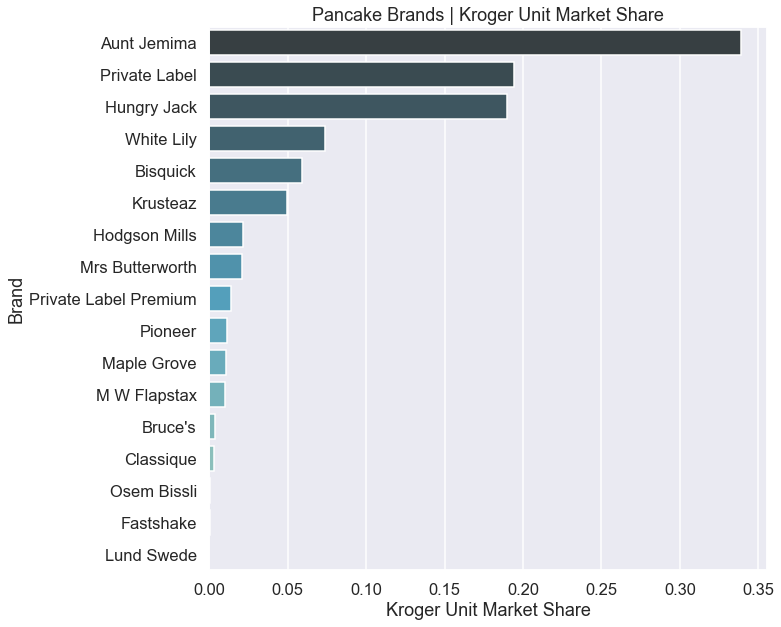

In [86]:
## PLOTS
plt.figure(figsize=(10, 10))
sns.set()
sns.set_context("talk")

Pancake_Unit_Market_Share_Plot = sns.barplot(y = 'pancake brand',
                                             x = 'pancake_unit_market_share',
                                             data = pancake_units,
                                             palette = 'GnBu_d',
                                             #order = pancake_units['pancake_unit_market_share'].value_counts().index,
                                            )
Pancake_Unit_Market_Share_Plot.set_title('Pancake Brands | Kroger Unit Market Share')
Pancake_Unit_Market_Share_Plot.set_ylabel('Brand')
Pancake_Unit_Market_Share_Plot.set_xlabel('Kroger Unit Market Share')

### Pasta Sauce Brands Unit Market Shares

In [110]:
## Units sold for each pasta brand dataframe creation
pasta_units = a_pivot_table[['pasta']]
pasta_units = pd.DataFrame(data=pasta_units)
pasta_units['pasta brand'] = pasta_units.index
pasta_units = pasta_units.dropna()
pasta_units = pasta_units.sort_values('pasta', ascending = False)

pasta_total_units = pasta_units['pasta'].sum()
pasta_units['pasta_unit_market_share'] = pasta_units['pasta']/pasta_total_units

pasta_units[:10]

commodity,pasta,pasta brand,pasta_unit_market_share
brand,,,
Private Label,1269263.0,Private Label,0.440588
Barilla,394454.0,Barilla,0.136923
Creamette,254572.0,Creamette,0.088367
Mueller,250389.0,Mueller,0.086915
Private Label Premium,208591.0,Private Label Premium,0.072406
Ronzoni,188376.0,Ronzoni,0.065389
San Giorgio,103059.0,San Giorgio,0.035774
No Yolks,57416.0,No Yolks,0.019930
Hodgson Mills,44310.0,Hodgson Mills,0.015381


Text(0.5, 0, 'Kroger Unit Market Share')

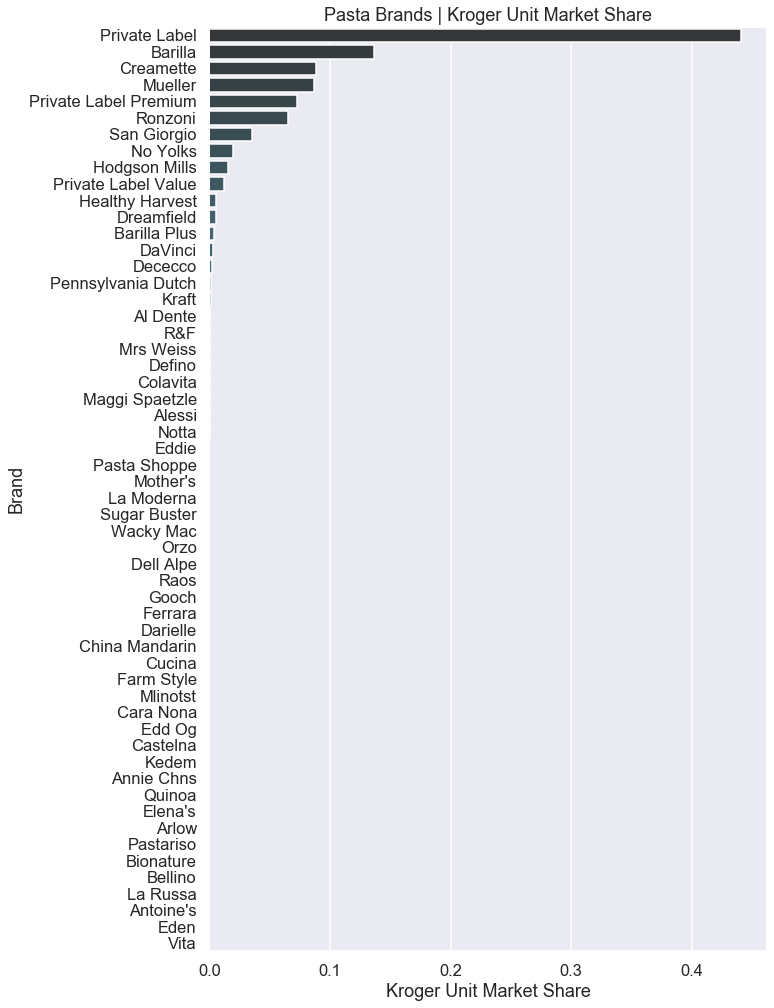

In [112]:
## PLOTS
plt.figure(figsize=(10, 17))
sns.set()
sns.set_context("talk")


Pasta_Unit_Market_Share_Plot = sns.barplot(y = 'pasta brand',
                                             x = 'pasta_unit_market_share',
                                             data = pasta_units,
                                             palette = 'GnBu_d'
                                            )
Pasta_Unit_Market_Share_Plot.set_title('Pasta Brands | Kroger Unit Market Share')
Pasta_Unit_Market_Share_Plot.set_ylabel('Brand')
Pasta_Unit_Market_Share_Plot.set_xlabel('Kroger Unit Market Share')

### Pasta Sauce Brands Unit Market Shares

In [101]:
## Units sold for each pasta sauce brand dataframe creation
pasta_sauce_units = a_pivot_table[['pasta sauce']]
pasta_sauce_units = pd.DataFrame(data=pasta_sauce_units)
pasta_sauce_units['pasta sauce brand'] = pasta_sauce_units.index
pasta_sauce_units = pasta_sauce_units.dropna()
pasta_sauce_units = pasta_sauce_units.sort_values('pasta sauce', ascending = False)

pasta_sauce_total_units = pasta_sauce_units['pasta sauce'].sum()
pasta_sauce_units['pasta_sauce_unit_market_share'] = pasta_sauce_units['pasta sauce']/pasta_sauce_total_units

pasta_sauce_units[:10]

commodity,pasta sauce,pasta sauce brand,pasta_sauce_unit_market_share
brand,,,
Ragu,891433.0,Ragu,0.385373
Prego,402897.0,Prego,0.174175
Private Label,306059.0,Private Label,0.132312
Hunt's,253519.0,Hunt's,0.109598
Classico,172242.0,Classico,0.074462
Bertolli,97379.0,Bertolli,0.042098
Barilla,78499.0,Barilla,0.033936
Newman's,49018.0,Newman's,0.021191
Private Label Premium,31969.0,Private Label Premium,0.013820


Text(0.5, 0, 'Kroger Unit Market Share')

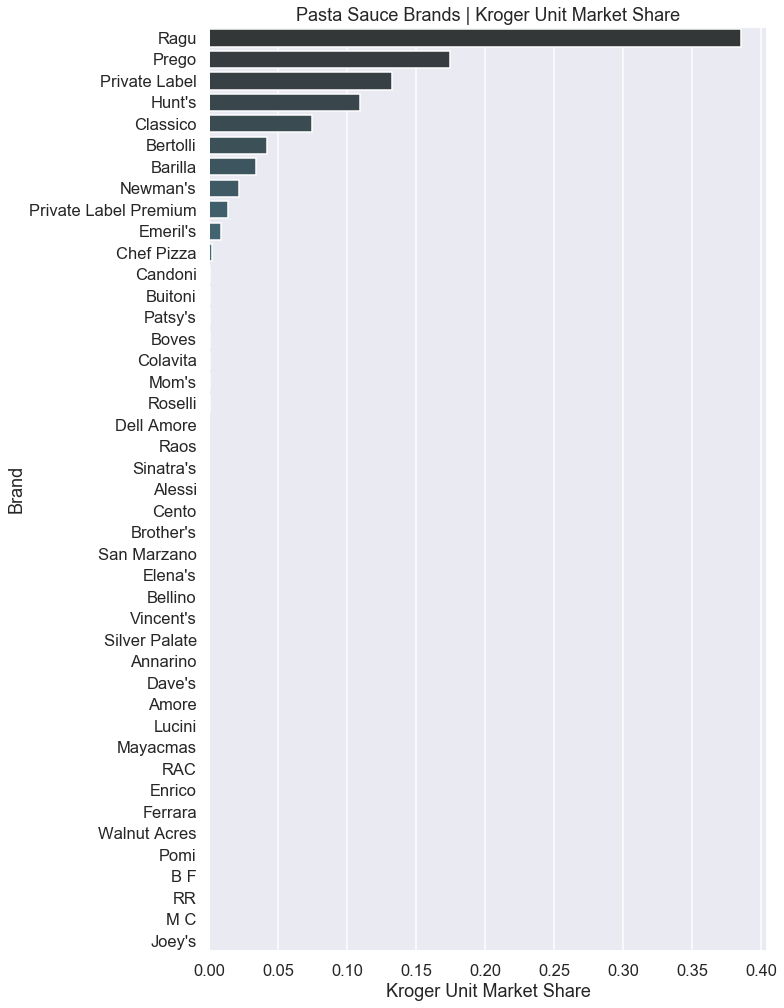

In [113]:
## PLOTS
plt.figure(figsize=(10, 17))
sns.set()
sns.set_context("talk")

Pasta_Sauce_Unit_Market_Share_Plot = sns.barplot(y = 'pasta sauce brand',
                                             x = 'pasta_sauce_unit_market_share',
                                             data = pasta_sauce_units,
                                             palette = 'GnBu_d',
                                            )
Pasta_Sauce_Unit_Market_Share_Plot.set_title('Pasta Sauce Brands | Kroger Unit Market Share')
Pasta_Sauce_Unit_Market_Share_Plot.set_ylabel('Brand')
Pasta_Sauce_Unit_Market_Share_Plot.set_xlabel('Kroger Unit Market Share')

### Syrup Brands Unit Market Shares

In [114]:
## Units sold for each syrup brand dataframe creation
syrup_units = a_pivot_table[['syrups']]
syrup_units = pd.DataFrame(data=syrup_units)
syrup_units['syrup brand'] = syrup_units.index
syrup_units = syrup_units.dropna()
syrup_units = syrup_units.sort_values('syrups', ascending = False)


syrup_total_units = syrup_units['syrups'].sum()
syrup_units['syrup_unit_market_share'] = syrup_units['syrups']/syrup_total_units

syrup_units[:10]

commodity,syrups,syrup brand,syrup_unit_market_share
brand,,,
Private Label,222524.0,Private Label,0.306940
Aunt Jemima,123938.0,Aunt Jemima,0.170955
Mrs Butterworth,52596.0,Mrs Butterworth,0.072549
Karo,52004.0,Karo,0.071732
Northwoods,51841.0,Northwoods,0.071507
Log Cabin,42503.0,Log Cabin,0.058627
Hungry Jack,35351.0,Hungry Jack,0.048762
Private Label Premium,27227.0,Private Label Premium,0.037556
Kellogg,19392.0,Kellogg,0.026748


Text(0.5, 0, 'Kroger Unit Market Share')

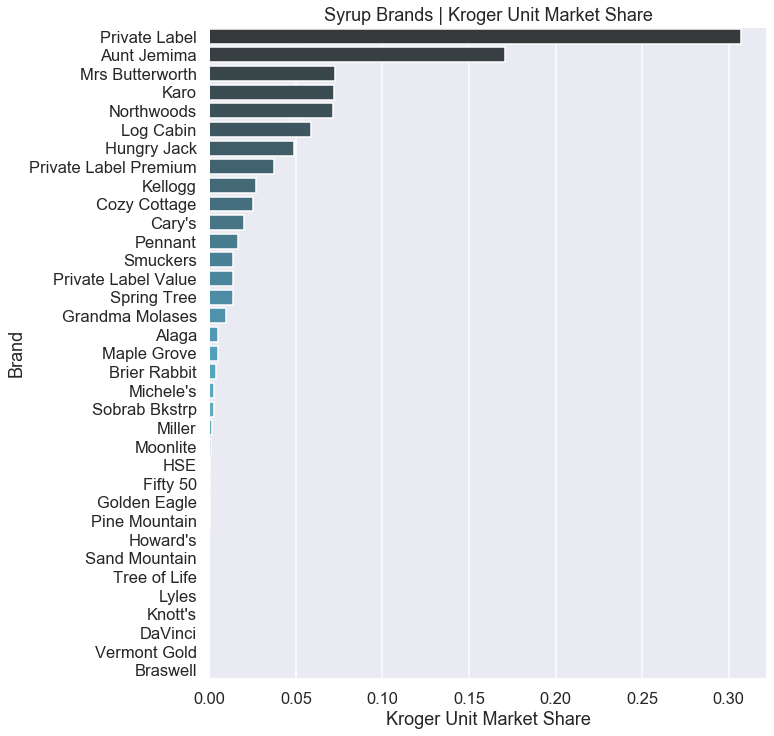

In [115]:
## PLOTS
plt.figure(figsize=(10, 12))
sns.set()
sns.set_context("talk")

Syrup_Unit_Market_Share_Plot = sns.barplot(y = 'syrup brand',
                                             x = 'syrup_unit_market_share',
                                             data = syrup_units,
                                             palette = 'GnBu_d'
                                            )
Syrup_Unit_Market_Share_Plot.set_title('Syrup Brands | Kroger Unit Market Share')
Syrup_Unit_Market_Share_Plot.set_ylabel('Brand')
Syrup_Unit_Market_Share_Plot.set_xlabel('Kroger Unit Market Share')

## Sales Market Share Metrics

#### Sales market share =  (brand purchases(units) / total category purchases by brand buyers)

In [21]:
## Creating a dataframe for the brands and commodities by SALES
b_pivot_table = data_tsp.pivot_table('dollar_sales', # can be replaced with units
                                     index = 'brand', # puts brand as the rows
                                     columns = 'commodity', # puts commoodities as the columns
                                     aggfunc=sum) # makes the values the sums
b_pivot_table = pd.DataFrame(data=a_pivot_table)

### Pancake Mix Dollar Sales Market Shares

In [105]:
## Sales for each pancake brand dataframe creation
pancake_sales = b_pivot_table[['pancake mixes']]
pancake_sales = pd.DataFrame(data=pancake_sales)
pancake_sales['pancake brand'] = pancake_sales.index
pancake_sales = pancake_sales.dropna()
pancake_sales = pancake_sales.sort_values('pancake mixes', ascending = False)


pancake_total_sales = pancake_units['pancake mixes'].sum()
pancake_sales['pancake_sales_market_share'] = pancake_sales['pancake mixes']/pancake_total_units

pancake_sales[:10]

commodity,pancake mixes,pancake brand,pancake_sales_market_share
brand,,,
Aunt Jemima,101853.0,Aunt Jemima,0.338780
Private Label,58396.0,Private Label,0.194235
Hungry Jack,57016.0,Hungry Jack,0.189645
White Lily,22222.0,White Lily,0.073914
Bisquick,17675.0,Bisquick,0.058790
Krusteaz,14796.0,Krusteaz,0.049214
Hodgson Mills,6372.0,Hodgson Mills,0.021194
Mrs Butterworth,6190.0,Mrs Butterworth,0.020589
Private Label Premium,4216.0,Private Label Premium,0.014023


Text(0.5, 0, 'Kroger Dollar Sales')

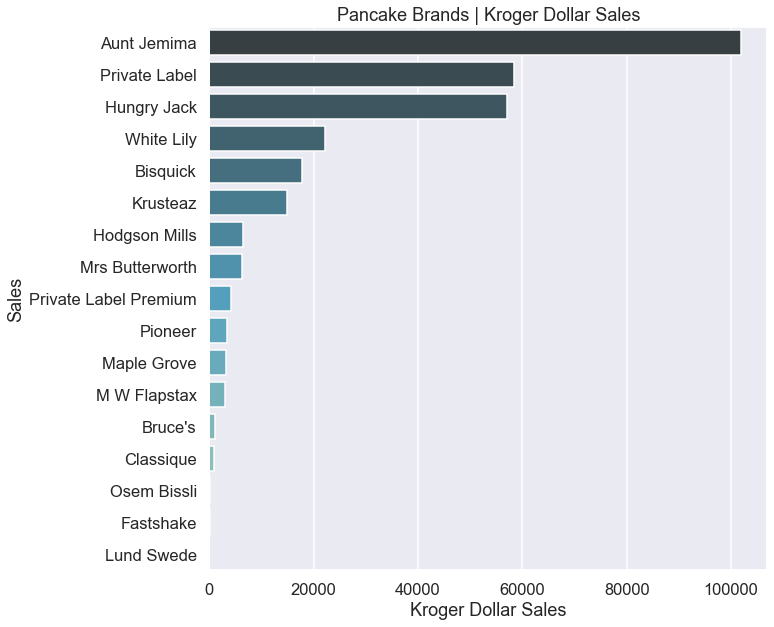

In [118]:
## PLOTS

# Dollar Sales
sns.set()
sns.set_context("talk")
plt.figure(figsize=(10, 10))
Pancake_Sales_Market_Share_Plot_a = sns.barplot(y = 'pancake brand',
                                             x = 'pancake mixes',
                                             data = pancake_sales,
                                             palette = 'GnBu_d',
                                            )
Pancake_Sales_Market_Share_Plot_a.set_title('Pancake Brands | Kroger Dollar Sales')
Pancake_Sales_Market_Share_Plot_a.set_ylabel('Sales')
Pancake_Sales_Market_Share_Plot_a.set_xlabel('Kroger Dollar Sales')

Text(0.5, 0, 'Kroger Sales Market Share')

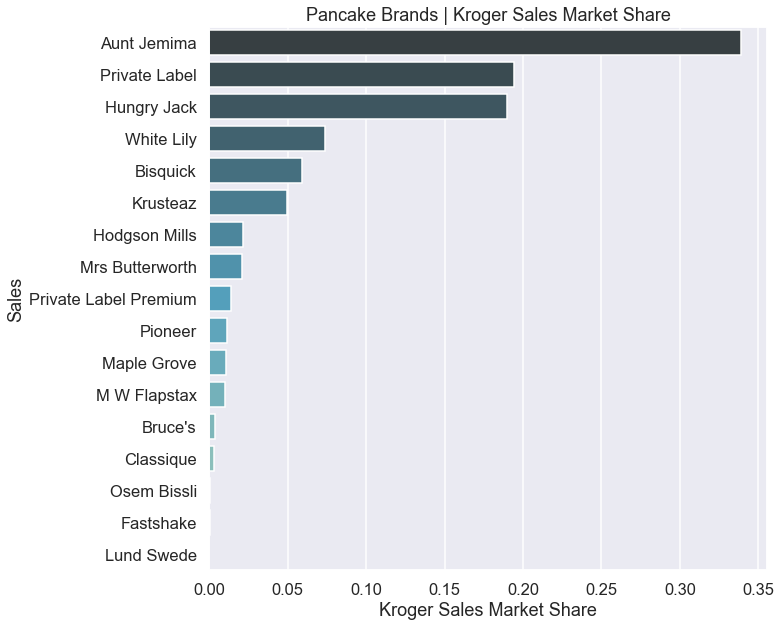

In [107]:
## PLOTS

# Market Share
sns.set()
sns.set_context("talk")
plt.figure(figsize=(10, 10))
Pancake_Sales_Market_Share_Plot_b = sns.barplot(y = 'pancake brand',
                                             x = 'pancake_sales_market_share',
                                             data = pancake_sales,
                                             palette = 'GnBu_d',
                                            )
Pancake_Sales_Market_Share_Plot_b.set_title('Pancake Brands | Kroger Sales Market Share')
Pancake_Sales_Market_Share_Plot_b.set_ylabel('Sales')
Pancake_Sales_Market_Share_Plot_b.set_xlabel('Kroger Sales Market Share')

### Pasta Dollar Sales Market Shares

In [121]:
## Sales for each pasta brand dataframe creation
pasta_sales = b_pivot_table[['pasta']]
pasta_sales = pd.DataFrame(data=pasta_sales)
pasta_sales['pasta brand'] = pasta_sales.index
pasta_sales = pasta_sales.dropna()
pasta_sales = pasta_sales.sort_values('pasta', ascending = False)

pasta_total_sales = pasta_sales['pasta'].sum()
pasta_sales['pasta_sales_market_share'] = pasta_sales['pasta']/pasta_total_sales

pasta_sales[:10]

commodity,pasta,pasta brand,pasta_sales_market_share
brand,,,
Private Label,1269263.0,Private Label,0.440588
Barilla,394454.0,Barilla,0.136923
Creamette,254572.0,Creamette,0.088367
Mueller,250389.0,Mueller,0.086915
Private Label Premium,208591.0,Private Label Premium,0.072406
Ronzoni,188376.0,Ronzoni,0.065389
San Giorgio,103059.0,San Giorgio,0.035774
No Yolks,57416.0,No Yolks,0.019930
Hodgson Mills,44310.0,Hodgson Mills,0.015381


Text(0.5, 0, 'Kroger Dollar Sales')

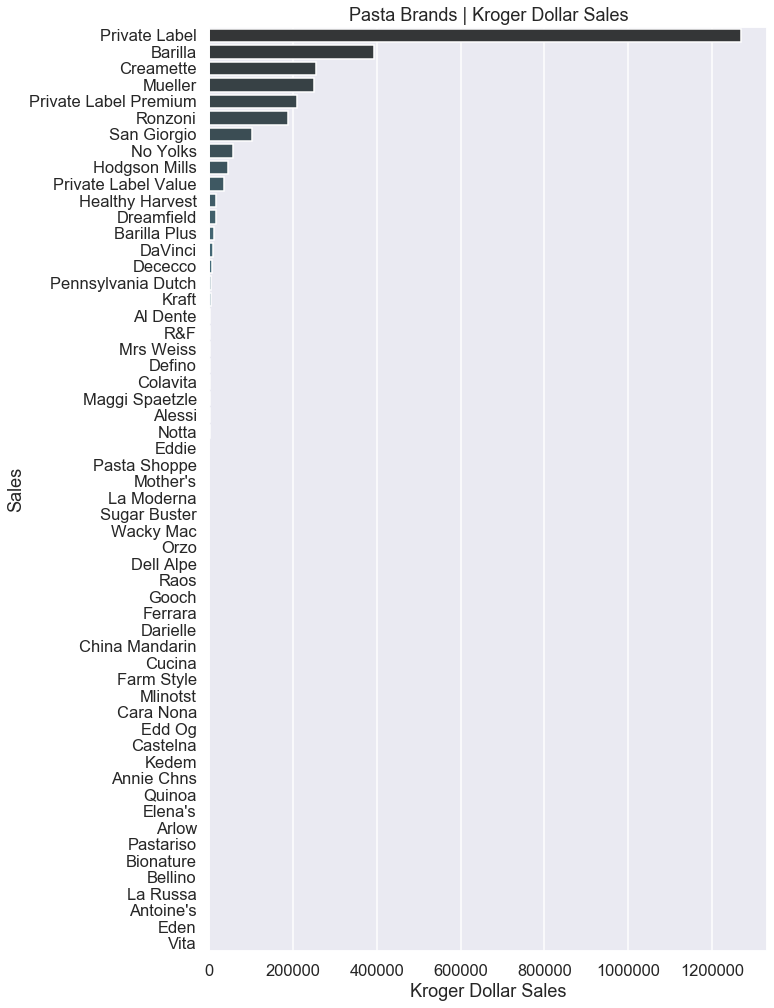

In [126]:
## PLOTS

# Dollar Sales
sns.set()
sns.set_context("talk")
plt.figure(figsize=(10, 17))
Pasta_Sales_Market_Share_Plot_a = sns.barplot(y = 'pasta brand',
                                             x = 'pasta',
                                             data = pasta_sales,
                                             palette = 'GnBu_d',
                                            )
Pasta_Sales_Market_Share_Plot_a.set_title('Pasta Brands | Kroger Dollar Sales')
Pasta_Sales_Market_Share_Plot_a.set_ylabel('Sales')
Pasta_Sales_Market_Share_Plot_a.set_xlabel('Kroger Dollar Sales')

Text(0.5, 0, 'Kroger Sales Market Share')

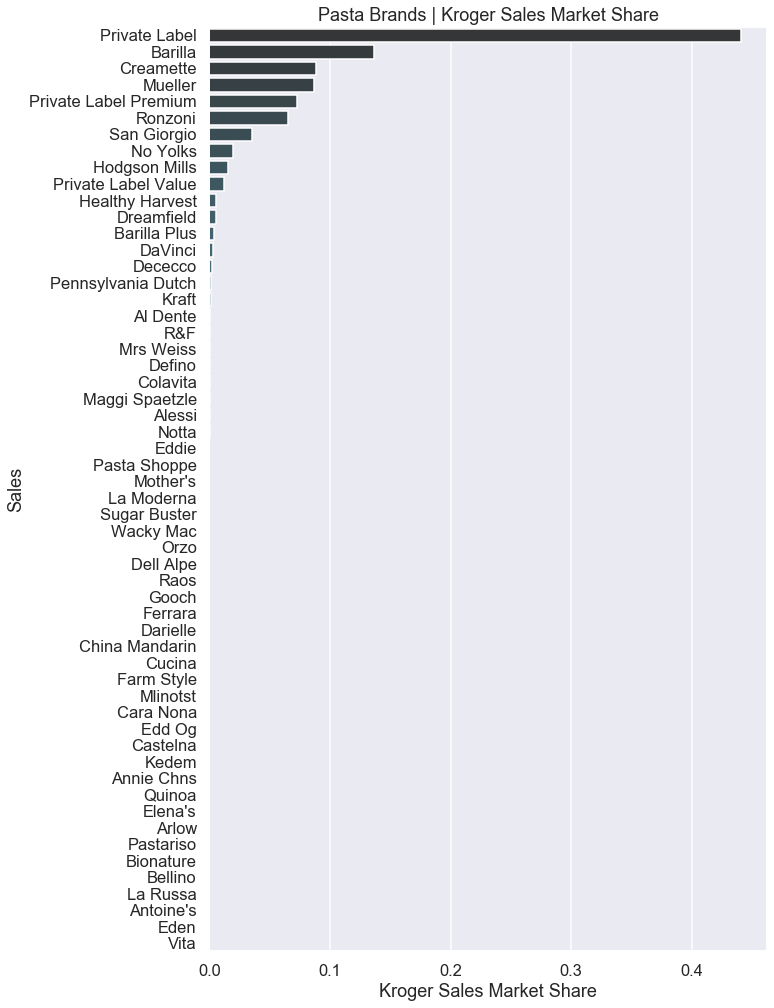

In [132]:
# Dollar Sales
sns.set()
sns.set_context("talk")
plt.figure(figsize=(10, 17))
Pasta_Sales_Market_Share_Plot_b = sns.barplot(y = 'pasta brand',
                                             x = 'pasta_sales_market_share',
                                             data = pasta_sales,
                                             palette = 'GnBu_d',
                                            )
Pasta_Sales_Market_Share_Plot_b.set_title('Pasta Brands | Kroger Sales Market Share')
Pasta_Sales_Market_Share_Plot_b.set_ylabel('Sales')
Pasta_Sales_Market_Share_Plot_b.set_xlabel('Kroger Sales Market Share')

# Casual Dataframe

In [12]:
## Gathering descriptive statistics for cont. var. of casual df
casual_descriptives = casual.describe()
print(casual_descriptives)

                upc          store           week      geography
count  3.513720e+05  351372.000000  351372.000000  351372.000000
mean   6.107931e+09     191.897815      69.844330       1.410332
std    2.881551e+09     111.168403      17.507184       0.491895
min    6.010113e+08       1.000000      43.000000       1.000000
25%    3.620000e+09      94.000000      55.000000       1.000000
50%    5.100001e+09     191.000000      68.000000       1.000000
75%    9.999968e+09     287.000000      85.000000       2.000000
max    9.999986e+09     387.000000     104.000000       2.000000


In [13]:
## Gathering the shape of the dataframe
casual.shape
# (351372, 6)
# Learning that there are 351,372 observations with 6 variables

(351372, 6)

## Graphical analysis of variable counts for casual dataframe

Text(0.5, 0, 'Count')

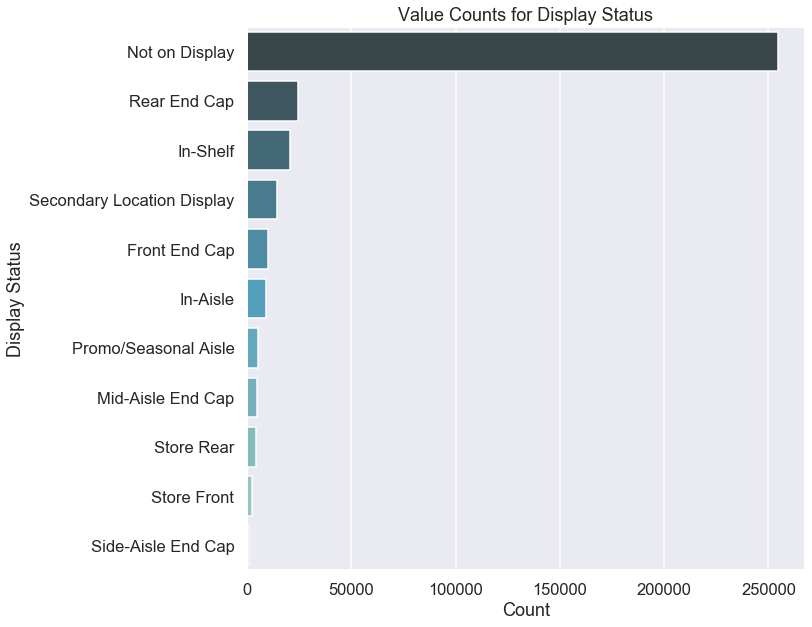

In [128]:
# display_desc: location of tempporary in store display containing the product
display_values = casual['display_desc'].value_counts()
plt.figure(figsize=(10, 10))
sns.set()
sns.set_context("talk")
display_values_plot = sns.countplot(y = 'display_desc',
                                    data = casual,
                                    palette = 'GnBu_d',
                                    order = casual['display_desc'].value_counts().index,
                                    )
display_values_plot.set_title('Value Counts for Display Status')
display_values_plot.set_ylabel('Display Status')
display_values_plot.set_xlabel('Count')

Text(0.5, 0, 'Count')

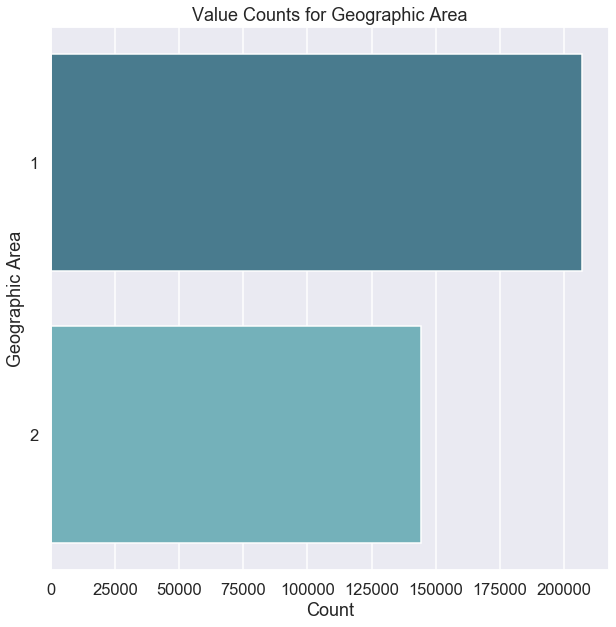

In [88]:
# geography
geo_values = casual['geography'].value_counts()
plt.figure(figsize=(10, 10))
sns.set()
sns.set_context("talk")

geo_values_plot = sns.countplot(y = 'geography',
                                    data = casual,
                                    palette = 'GnBu_d',
                                    order = casual['geography'].value_counts().index)
geo_values_plot.set_title('Value Counts for Geographic Area')
geo_values_plot.set_ylabel('Geographic Area')
geo_values_plot.set_xlabel('Count')

Text(0.5, 0, 'Count')

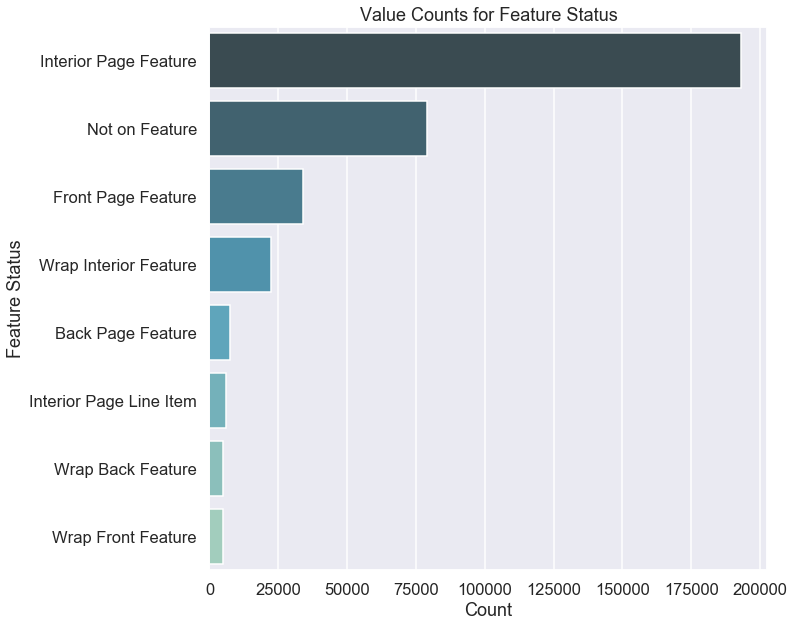

In [89]:
# feature_desc: location of product on weekly mailer
feature_values = casual['feature_desc'].value_counts()
plt.figure(figsize=(10, 10))
sns.set()
sns.set_context("talk")

feature_values_plot = sns.countplot(y = 'feature_desc',
                                    data = casual,
                                    palette = 'GnBu_d',
                                    order = casual['feature_desc'].value_counts().index)
feature_values_plot.set_title('Value Counts for Feature Status')
feature_values_plot.set_ylabel('Feature Status')
feature_values_plot.set_xlabel('Count')

# Product Dataframe

In [17]:
## Gathering descriptive statistics for cont. var. of product df
product_descriptives = product.describe()
print(product_descriptives)

                upc
count  9.270000e+02
mean   5.534602e+09
std    2.754209e+09
min    1.111124e+08
25%    3.340061e+09
50%    5.100005e+09
75%    7.520001e+09
max    9.999986e+09


In [18]:
## Gathering shape of the dataframe
product.shape
# 927 observations and 5 variables

(927, 5)

## Graphical analysis of variable counts for product dataframe

In [19]:
# commodity (4 types of carb categories)
commodity_values = product['commodity'].value_counts()
print(commodity_values)

pasta            448
pasta sauce      294
syrups           139
pancake mixes     46
Name: commodity, dtype: int64


Text(0.5, 0, 'Count')

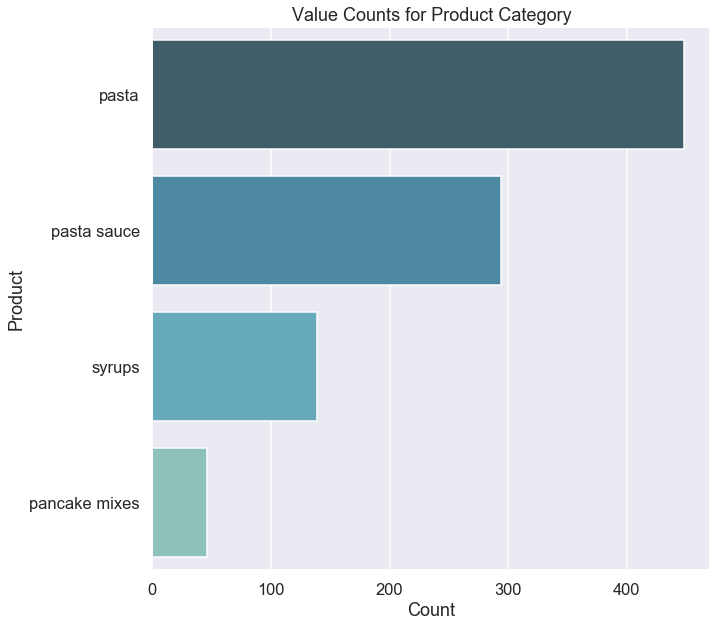

In [90]:
# commodity (4 types of carb categories)
commodity_values = product['commodity'].value_counts()
plt.figure(figsize=(10, 10))
sns.set()
sns.set_context("talk")

commodity_values_plot = sns.countplot(y = 'commodity',
                                    data = product,
                                    palette = 'GnBu_d',
                                    order = product['commodity'].value_counts().index)
commodity_values_plot.set_title('Value Counts for Product Category')
commodity_values_plot.set_ylabel('Product')
commodity_values_plot.set_xlabel('Count')

In [21]:
# brand
brand_values = product['brand'].value_counts()
print(brand_values)

Private Label            71
Barilla                  50
Ragu                     47
Private Label Premium    43
Prego                    40
                         ..
Osem Bissli               1
M C                       1
Walnut Acres              1
B F                       1
Edd Og                    1
Name: brand, Length: 131, dtype: int64


In [22]:
# product_size
product_size_value = product_values = product['product_size'].value_counts()
print(product_size_value)

16 OZ        211
26 OZ        108
12 OZ        100
24 OZ         47
8 OZ          36
            ... 
45    OZ       1
1.5 LB         1
10    OZ       1
KH# 71916      1
3.5 OZ         1
Name: product_size, Length: 146, dtype: int64


# Store Dataframe

In [23]:
## Gathering descriptive statistics for cont. var. of store df
store_descriptives = store.describe()
print(store_descriptives)

            store  store_zip_code
count  387.000000      387.000000
mean   194.000000    35450.255814
std    111.861522     6677.325786
min      1.000000    29063.000000
25%     97.500000    30142.000000
50%    194.000000    31545.000000
75%    290.500000    40086.500000
max    387.000000    62966.000000


In [24]:
## Gathering shape of store dataframe
store.shape
# 387 observations, 2 variables

(387, 2)

# Transactions Dataframe

In [25]:
## Gathering descriptive statistics for cont. var. of transactions df
transactions_descrptives = transactions.describe()
print(transactions_descrptives)

                upc  dollar_sales         units  time_of_transaction  \
count  5.197681e+06  5.197681e+06  5.197681e+06         5.197681e+06   
mean   6.203548e+09  1.756568e+00  1.196616e+00         1.543559e+03   
std    3.152023e+09  1.128989e+00  5.686024e-01         3.850193e+02   
min    1.111124e+08 -1.176000e+01  1.000000e+00         0.000000e+00   
25%    3.620000e+09  9.900000e-01  1.000000e+00         1.258000e+03   
50%    5.100013e+09  1.500000e+00  1.000000e+00         1.602000e+03   
75%    9.999982e+09  2.190000e+00  1.000000e+00         1.825000e+03   
max    9.999986e+09  1.531400e+02  1.560000e+02         2.359000e+03   

          geography          week     household         store        basket  \
count  5.197681e+06  5.197681e+06  5.197681e+06  5.197681e+06  5.197681e+06   
mean   1.459126e+00  5.322320e+01  2.231376e+05  2.020152e+02  1.662961e+06   
std    4.983265e-01  3.005075e+01  1.412164e+05  1.119982e+02  9.593189e+05   
min    1.000000e+00  1.000000e+00  

In [26]:
## Gathering shape of transactions dataframe
transactions.shape

(5197681, 11)

## Graphical analysis of variable counts for transactions dataframe

Text(0.5, 0, 'Units')

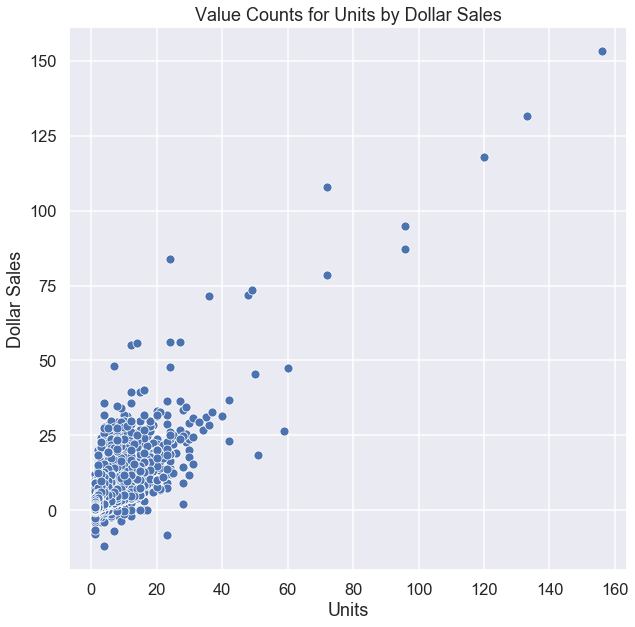

In [91]:
# dollar_sales and units
plt.figure(figsize=(10, 10))
sns.set()
sns.set_context("talk")

dollar_sales_values_plot = sns.scatterplot(x = 'units',
                                           y = 'dollar_sales',
                                           data = transactions,
                                           palette = 'GnBu_d')
dollar_sales_values_plot.set_title('Value Counts for Units by Dollar Sales')
dollar_sales_values_plot.set_ylabel('Dollar Sales')
dollar_sales_values_plot.set_xlabel('Units')

Text(0.5, 0, 'Units')

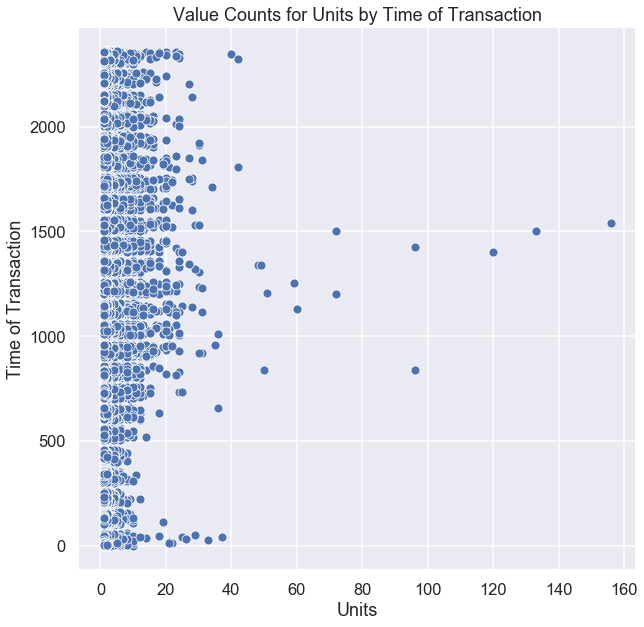

In [92]:
# time_of_transaction
plt.figure(figsize=(10, 10))
sns.set()
sns.set_context("talk")

time_of_transaction_values_plot = sns.scatterplot(x = 'units',
                                      y = 'time_of_transaction',
                                      data = transactions,
                                      palette = 'GnBu_d')
time_of_transaction_values_plot.set_title('Value Counts for Units by Time of Transaction')
time_of_transaction_values_plot.set_ylabel('Time of Transaction')
time_of_transaction_values_plot.set_xlabel('Units')

Text(0.5, 0, 'Distribution')

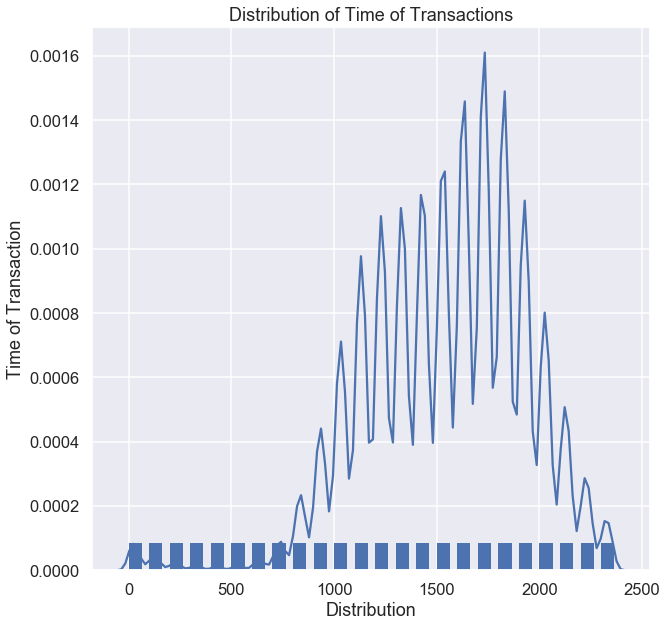

In [93]:
# time_of_transaction
plt.figure(figsize=(10, 10))
sns.set()
sns.set_context("talk")

x = transactions['time_of_transaction']
household_values_plot = sns.distplot(x, rug=True, hist=False)
household_values_plot.set_title('Distribution of Time of Transactions')
household_values_plot.set_ylabel('Time of Transaction')
household_values_plot.set_xlabel('Distribution')

Text(0.5, 0, 'Week')

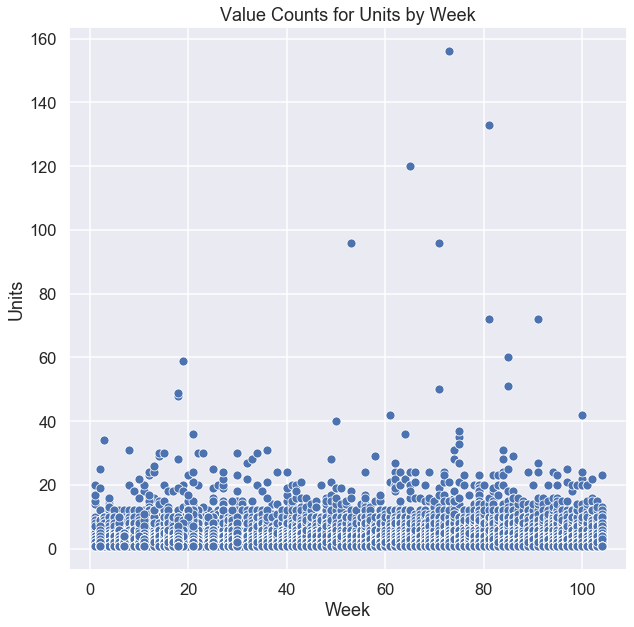

In [94]:
# week
plt.figure(figsize=(10, 10))
sns.set()
sns.set_context("talk")

week_values_plot = sns.scatterplot(x = 'week',
                                   y = 'units',
                                   data = transactions,
                                   palette = 'GnBu_d')
week_values_plot.set_title('Value Counts for Units by Week')
week_values_plot.set_ylabel('Units')
week_values_plot.set_xlabel('Week')

Text(0.5, 0, 'Distribution')

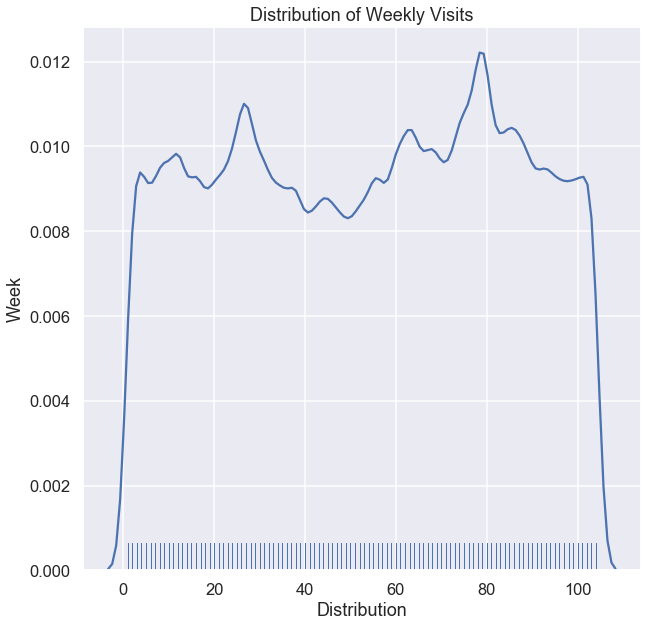

In [95]:
# week
plt.figure(figsize=(10, 10))
sns.set()
sns.set_context("talk")

x = transactions['week']
household_values_plot = sns.distplot(x, rug=True, hist=False)
household_values_plot.set_title('Distribution of Weekly Visits')
household_values_plot.set_ylabel('Week')
household_values_plot.set_xlabel('Distribution')

Text(0.5, 0, 'Distribution')

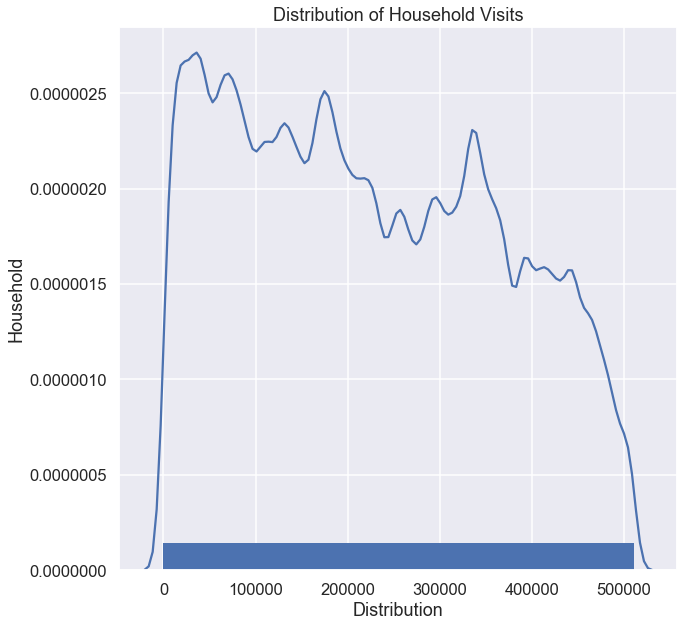

In [96]:
# household
plt.figure(figsize=(10, 10))
sns.set()
sns.set_context("talk")

x = transactions['household']
household_values_plot = sns.distplot(x, rug=True, hist=False)
household_values_plot.set_title('Distribution of Household Visits')
household_values_plot.set_ylabel('Household')
household_values_plot.set_xlabel('Distribution')

Text(0.5, 0, 'Day')

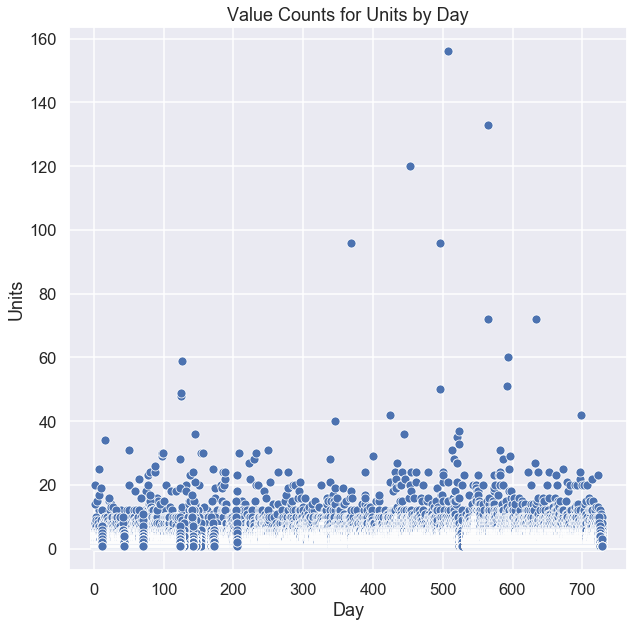

In [97]:
# day
plt.figure(figsize=(10, 10))
sns.set()
sns.set_context("talk")

day_values_plot = sns.scatterplot(x = 'day',
                                   y = 'units',
                                   data = transactions,
                                   palette = 'GnBu_d')
day_values_plot.set_title('Value Counts for Units by Day')
day_values_plot.set_ylabel('Units')
day_values_plot.set_xlabel('Day')

Text(0.5, 0, 'Distribution')

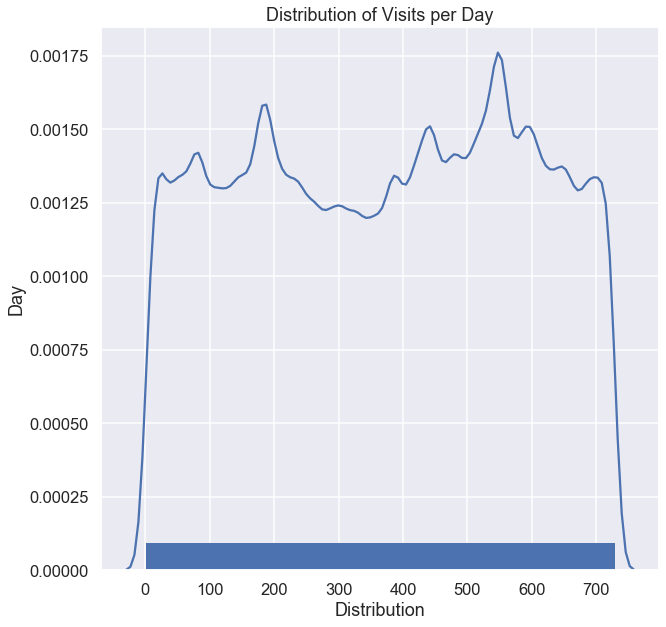

In [98]:
# day
plt.figure(figsize=(10, 10))
sns.set()
sns.set_context("talk")

x = transactions['day']
day_values_plot = sns.distplot(x, rug=True, hist=False)
day_values_plot.set_title('Distribution of Visits per Day')
day_values_plot.set_ylabel('Day')
day_values_plot.set_xlabel('Distribution')

Text(0.5, 0, 'Count')

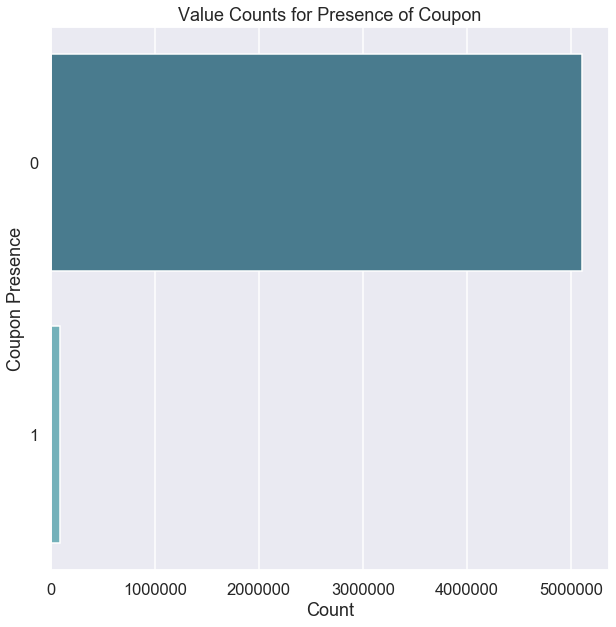

In [99]:
# coupon
plt.figure(figsize=(10, 10))
sns.set()
sns.set_context("talk")

coupon_values = transactions['coupon'].value_counts()
coupon_values_plot = sns.countplot(y = 'coupon',
                                  data = transactions,
                                  palette = 'GnBu_d',
                                  order = transactions['coupon'].value_counts().index)
coupon_values_plot.set_title('Value Counts for Presence of Coupon')
coupon_values_plot.set_ylabel('Coupon Presence')
coupon_values_plot.set_xlabel('Count')

# Shape and Correlation Analysis for Merged Sets

In [ ]:
data_cs[:10]
# casual and store

In [ ]:
data_cs.info()

In [ ]:
data_tsp[:10]
# transactions, store, product...  need casual

In [ ]:
data_tsp.info()

In [ ]:
corr_data_tsp = data_tsp.corr(method='pearson')
print(corr_data_tsp)

In [ ]:
corr_data_cs = data_cs.corr(method='pearson')
print(corr_data_cs)

# Feature Engineering and Pivot Tables for TSP Dataframe (transactions, store, product)

In [ ]:
## Longitudinal pivot table
# Each commodity has how many household purchasers over the weeks recorded?
hh_by_commodity_pivot = data_tsp.pivot_table('household',
                                             index = 'commodity',
                                             columns = 'week')
print(hh_by_commodity_pivot)

In [ ]:
## Longitudinal pivot table
# Each brand has how many household purchasers over the weeks recorded?
hh_by_brand_pivot  = data_tsp.pivot_table('household',
                                          index = 'brand',
                                          columns = 'week')
print(hh_by_brand_pivot)

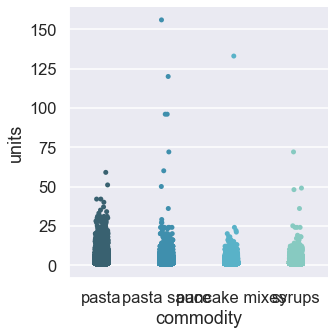

In [138]:
## Each commodity has how many units sold over the weeks?
commodity_by_units_pivot = data_tsp.pivot_table('units',
                                                index = 'commodity',
                                                columns = 'week',
                                               )

commodity_by_units_scatter = sns.catplot(x = 'commodity',
                                             y = 'units',
                                             palette = 'GnBu_d',
                                             data = data_tsp)

In [ ]:
print(commodity_by_units_pivot)

In [ ]:
# divide weeks by years to add categories
# the data was collected over a two year period
year = pd.cut(data_tsp['week'],[0,52,105])

commodity_by_units_year_pivot = data_tsp.pivot_table('units',
                                                index = 'commodity',
                                                columns = year,
                                                aggfunc=sum)
print(commodity_by_units_year_pivot)